In [ ]:
#Install packages
!pip install rasterio
!pip install rastertodataframe
!pip install pyproj
!pip install geopandas
!pip install osgeo

In [2]:
#Import Base Libraries
import pandas as pd
import numpy as np
import glob

#Import Raster Libraries
import rasterio
from rastertodataframe import raster_to_dataframe

#Import Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
from rasterio.plot import show

In [3]:
#Mount to drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Area Tiff Files

Read in Tiff files of area and merge.

In [27]:
#Create folder path and list variables
folder_path = '/content/drive/MyDrive/AISC/North_Quebec'
file_list = glob.glob(folder_path + "/*.tiff")

#Read in first tiff layer and rename column
main_dataframe = raster_to_dataframe(file_list[0])
main_dataframe = main_dataframe.rename(columns={'Band_1': 'B1'})

#For loop to read rest of files and merge dataframe
for i in range(1, len(file_list)):
  data = raster_to_dataframe(file_list[i])
  data = data.rename(columns={'Band_1': f'B{i+1}'})
  main_dataframe = pd.concat([main_dataframe, data], axis = 1)

In [29]:
#View new dataframe
main_dataframe

,B1,B2,B3,B4,B5,B6,B7,B8,B9,B10,B11,B12
0,0.8316,0.7817,0.0395,0.7191,0.5394,0.8245,0.6466,0.8558,0.8676,0.0398,0.6992,0.7392
1,0.7040,0.6203,0.0334,0.5312,0.5231,0.6990,0.4784,0.7461,0.7360,0.0342,0.5596,0.7327
2,0.7232,0.6461,0.0355,0.5732,0.5784,0.7175,0.5136,0.7686,0.7683,0.0367,0.5916,0.7715
3,0.8756,0.8271,0.0383,0.7641,0.6669,0.8736,0.6862,0.8992,0.9153,0.0385,0.7559,0.8387
4,0.8930,0.8393,0.0400,0.7711,0.6909,0.8860,0.6921,0.9236,0.9365,0.0405,0.7649,0.8690
...,...,...,...,...,...,...,...,...,...,...,...,...
14233,0.7697,0.7517,0.0429,0.6972,0.6683,0.7726,0.6465,0.7909,0.7891,0.0468,0.7021,0.8032
14234,0.5719,0.5780,0.0395,0.5434,0.5696,0.5999,0.5002,0.5762,0.5784,0.0461,0.5439,0.6732
14235,0.6783,0.6832,0.0397,0.6321,0.5055,0.6954,0.5781,0.6920,0.6892,0.0446,0.6195,0.5897
14236,0.7635,0.7403,0.0400,0.6942,0.5280,0.7775,0.6247,0.7872,0.7820,0.0436,0.6778,0.5856


## NARCAN Data

Upload the clipped and transformed NRCANN Data

Merge with main_dataframe

In [30]:
#Path for raster data from NRCAN
data_path = '/content/drive/MyDrive/AISC/Edited Data/N_Quebec.tif'

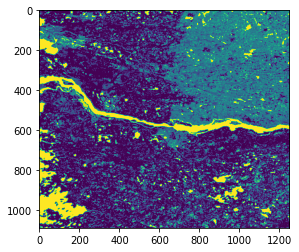

In [31]:
#Open data with rasterio
img = rasterio.open(data_path)
show(img, 0)

In [32]:
#Read the image
array = img.read()

#Create numpy array
array = np.array(array)

#Check shape
array.shape

(1, 1087, 1250)

In [33]:
#Read NRCAN raster to dataframe
nrcann = raster_to_dataframe(data_path)
nrcann.head()

,Band_1
0,18
1,18
2,18
3,18
4,18


In [34]:
#Rename column
nrcann = nrcann.rename(columns={'Band_1':'Class'})

#Print sum of classification types
print('Number of NRCANN Classes: ', nrcann.Class.nunique())

#Check which classifications are listed
print(nrcann.Class.value_counts())

Number of NRCANN Classes:  12
1     666892
8     269744
18    138736
2     102547
5      55786
12     45992
14     41245
10     14160
16     12259
6       4915
13      4016
17      2458
Name: Class, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Land Cover Density')

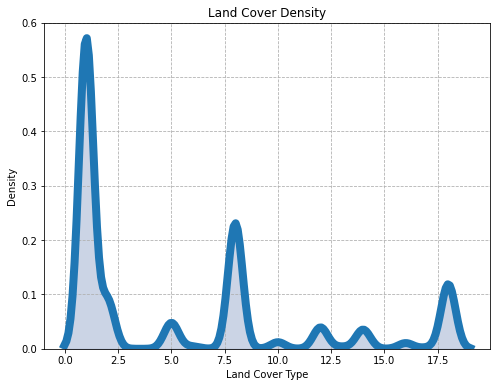

In [35]:
#Plot Class distribution
plt.figure(figsize=[8,6])
plt.grid(linestyle='--')
dp = sns.distplot(nrcann.Class, hist=False, kde_kws=dict(linewidth=8))
l1 = dp.lines[0]
x1 = l1.get_xydata()[:,0]
y1 = l1.get_xydata()[:,1]
dp.fill_between(x1,y1, color="#5471ab", alpha=0.3)
dp.set_xlabel("Land Cover Type")
dp.set_title("Land Cover Density")

In [36]:
#Merge nrcann with main_dataframe
data = pd.concat([main_dataframe, nrcann], axis=1)
data.head()

,B1,B2,B3,B4,B5,B6,B7,B8,B9,B10,B11,B12,Class
0,0.8316,0.7817,0.0395,0.7191,0.5394,0.8245,0.6466,0.8558,0.8676,0.0398,0.6992,0.7392,18
1,0.7040,0.6203,0.0334,0.5312,0.5231,0.6990,0.4784,0.7461,0.7360,0.0342,0.5596,0.7327,18
2,0.7232,0.6461,0.0355,0.5732,0.5784,0.7175,0.5136,0.7686,0.7683,0.0367,0.5916,0.7715,18
3,0.8756,0.8271,0.0383,0.7641,0.6669,0.8736,0.6862,0.8992,0.9153,0.0385,0.7559,0.8387,18
4,0.8930,0.8393,0.0400,0.7711,0.6909,0.8860,0.6921,0.9236,0.9365,0.0405,0.7649,0.8690,18


In [37]:
#Save merged data
data.to_csv('/content/drive/MyDrive/n_qc2_land_class_data.csv', index = False)